# Comparing Distributions

In [1]:
import collections
import pandas as pd
import networkx as nx
import itertools
import numpy as np

In [2]:
assert nx.__version__, '2.0'

In [3]:
from scipy import stats

In [4]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as lines

%matplotlib inline

In [5]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

In [6]:
G = nx.read_gml('../data/prisoners_network.gml')
Z = nx.read_gml('../data/price_of_anarchy_network.gml')
H = nx.read_gml('../data/auction_network.gml')

In [7]:
def test_normality(distribution):
    alpha = 0.05
    z, p = stats.mstats.normaltest(distribution)

    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("The null hypothesis can be rejected. It is not normally distributed.")
    else:
        print("The null hypothesis cannot be rejected. It is normally distributed.")

In [8]:
def test_kruskal(distributions):
    alpha = 0.05
    _, p = stats.kruskal(distributions[0],distributions[1], distributions[2])
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(p, "The null hypothesis can be rejected.")
    else:
        print(p, "The null hypothesis cannot be rejected.")

In [9]:
def test_mannwhitneyu(distributions, alternative):
    alpha = 0.05
    _, p = stats.mannwhitneyu(distributions[0],distributions[1], alternative=alternative)
    
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print(p, "The null hypothesis can be rejected.")
    else:
        print(p, "The null hypothesis cannot be rejected.")

Degree distributions
---------------------

In [10]:
pd_distribution = sorted([d for n, d in G.degree()], reverse=True)
anarchy_distribution = sorted([d for n, d in Z.degree()], reverse=True)
auction_distribution = sorted([d for n, d in H.degree()], reverse=True)

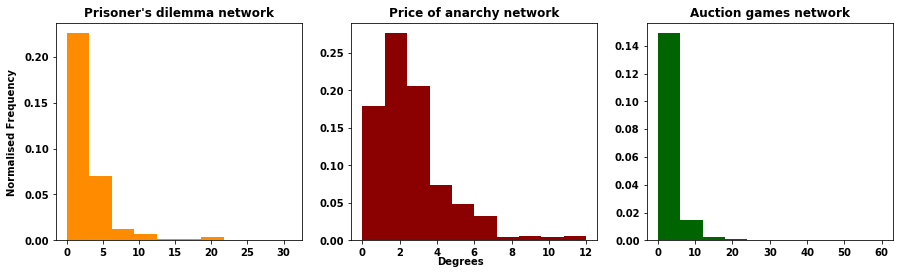

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))
axes[0].hist(pd_distribution,  color='darkorange', normed=True);
axes[0].set_title("Prisoner's dilemma network", fontweight='bold')

axes[1].hist(anarchy_distribution,  color='darkred', normed=True);
axes[1].set_title("Price of anarchy network", fontweight='bold')

axes[2].hist(auction_distribution, color='darkgreen', normed=True);
axes[2].set_title("Auction games network", fontweight='bold')

fig.text(0.5, 0.04, 'Degrees', ha='center')
fig.text(0.08, 0.5, 'Normalised Frequency', va='center', rotation='vertical');

plt.savefig('/home/nightwing/rsc/Literature-Article/assets/images/degrees_histrograms.pdf', format='pdf', bbox_inches='tight')

In [12]:
test_normality(pd_distribution)

The null hypothesis can be rejected. It is not normally distributed.


In [13]:
test_normality(auction_distribution)

The null hypothesis can be rejected. It is not normally distributed.


In [14]:
test_normality(anarchy_distribution)

The null hypothesis can be rejected. It is not normally distributed.


In [15]:
test_kruskal([pd_distribution, anarchy_distribution, auction_distribution])

0.456147643725 The null hypothesis cannot be rejected.


Betweenness centrality comparison
---------------------------------

In [16]:
with open('pd_bc_dist.tex', 'r') as textfile:
    pd_bc = textfile.read()

In [17]:
with open('pa_bc_dist.tex', 'r') as textfile:
    pa_bc = textfile.read()

In [18]:
with open('ag_bc_dist.tex', 'r') as textfile:
    ag_bc = textfile.read()

In [19]:
pd_bc = [float(i) for i in pd_bc.replace('[', '').replace(']', '').split(',')]
pa_bc = [float(i) for i in pa_bc.replace('[', '').replace(']', '').split(',')]
ag_bc = [float(i) for i in ag_bc.replace('[', '').replace(']', '').split(',')]

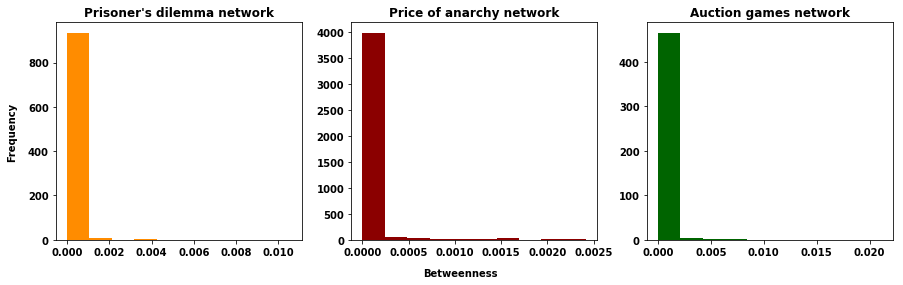

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].hist(pd_bc,  color='darkorange', normed=True);
axes[0].set_title("Prisoner's dilemma network", fontweight='bold')

axes[1].hist(pa_bc,  color='darkred', normed=True);
axes[1].set_title("Price of anarchy network", fontweight='bold')

axes[2].hist(ag_bc, color='darkgreen', normed=True);
axes[2].set_title("Auction games network", fontweight='bold')

fig.text(0.5, 0, 'Betweenness', ha='center')
fig.text(0.08, 0.5, 'Frequency', va='center', rotation='vertical');

In [21]:
test_kruskal([pd_bc, pa_bc, ag_bc])

1.2759882833e-07 The null hypothesis can be rejected.


In [22]:
test_mannwhitneyu([pd_bc, pa_bc], 'less')

0.0439269349349 The null hypothesis can be rejected.


In [23]:
test_mannwhitneyu([pd_bc, ag_bc], 'less')

1.3701599679e-08 The null hypothesis can be rejected.


Closeness centrality comparison
---------------------------------

In [24]:
with open('pd_cc_dist.tex', 'r') as textfile:
    pd_cc = textfile.read()

In [25]:
with open('pa_cc_dist.tex', 'r') as textfile:
    pa_cc = textfile.read()

In [26]:
with open('ag_cc_dist.tex', 'r') as textfile:
    ag_cc = textfile.read()

In [27]:
pd_cc = [float(i) for i in pd_cc.replace('[', '').replace(']', '').split(',')]
pa_cc = [float(i) for i in pa_cc.replace('[', '').replace(']', '').split(',')]
ag_cc = [float(i) for i in ag_cc.replace('[', '').replace(']', '').split(',')]

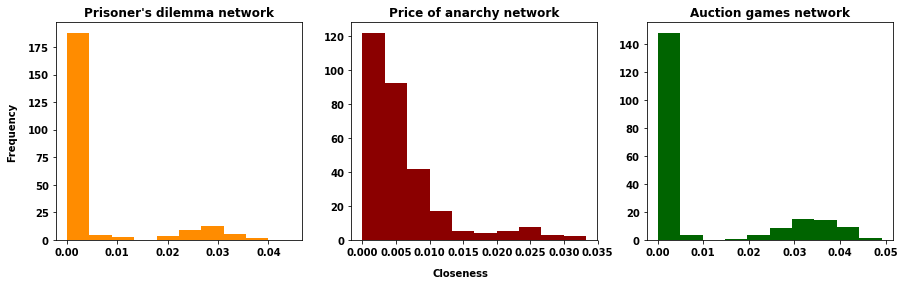

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 4))

axes[0].hist(pd_cc,  color='darkorange', normed=True);
axes[0].set_title("Prisoner's dilemma network", fontweight='bold')

axes[1].hist(pa_cc,  color='darkred', normed=True);
axes[1].set_title("Price of anarchy network", fontweight='bold')

axes[2].hist(ag_cc, color='darkgreen', normed=True);
axes[2].set_title("Auction games network", fontweight='bold')

fig.text(0.5, 0, 'Closeness', ha='center')
fig.text(0.08, 0.5, 'Frequency', va='center', rotation='vertical');

In [31]:
test_kruskal([pd_cc, pa_cc, ag_cc])

7.30418703556e-87 The null hypothesis can be rejected.


In [29]:
test_mannwhitneyu([pd_bc, pa_cc], 'less')

0.0 The null hypothesis can be rejected.


In [30]:
test_mannwhitneyu([pd_cc, ag_cc], 'greater')

4.10048718811e-08 The null hypothesis can be rejected.
